<a href="https://colab.research.google.com/github/lmgomero95/ECE_AML/blob/main/Mini_Project_1_ECE8487.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import json
import ast
import math
import statistics
from os import path
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelBinarizer
from scipy import sparse
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install datacompy
import datacompy
import warnings
warnings.filterwarnings('ignore')
print('Libraries Imported')

Libraries Imported


In [2]:
# libraries for sentient analysis
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:

filename = 'beer_50000.json'

# Reading JSON data from a file
with open(filename) as f:
    data = [ast.literal_eval(doc) for doc in f.readlines()]
#print(data)

df = pd.DataFrame(data)


In [4]:

column_headers = list(df.columns.values)
n_headers=len(column_headers)

print("Column Headers :", column_headers)
print("Number of Headers :", n_headers)

print(df)

print(list(df['review/overall'].unique()))

Column Headers : ['review/appearance', 'beer/style', 'review/palate', 'review/taste', 'beer/name', 'review/timeUnix', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'review/timeStruct', 'review/overall', 'review/text', 'user/profileName', 'review/aroma', 'user/gender', 'user/birthdayRaw', 'user/birthdayUnix', 'user/ageInSeconds']
Number of Headers : 18
       review/appearance                        beer/style  review/palate  \
0                    2.5                        Hefeweizen            1.5   
1                    3.0                English Strong Ale            3.0   
2                    3.0            Foreign / Export Stout            3.0   
3                    3.5                   German Pilsener            2.5   
4                    4.0    American Double / Imperial IPA            4.0   
...                  ...                               ...            ...   
49995                4.0  American Double / Imperial Stout            4.0   
49996                3.5  Americ

In [5]:
n_styles=len(df['beer/style'].unique())
print("Number of styles :", n_styles)
print(list(df['beer/style'].unique()))

n_names=len(df['beer/name'].unique())
print("Number of beers :", n_names)
print(list(df['beer/name'].unique()))

no_null_style = df['beer/style'].count()
print("Registers with Beer Style (from the 50000):", no_null_style)
no_null_beername = df['beer/name'].count()
print("Registers with Beer Name (from the 50000):", no_null_beername)

Number of styles : 95
['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout', 'German Pilsener', 'American Double / Imperial IPA', 'Herbed / Spiced Beer', 'Oatmeal Stout', 'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)', 'American Porter', 'Belgian Strong Dark Ale', 'Russian Imperial Stout', 'American Amber / Red Ale', 'American Strong Ale', 'MÃ¤rzen / Oktoberfest', 'American Adjunct Lager', 'American Blonde Ale', 'American IPA', 'Fruit / Vegetable Beer', 'English Bitter', 'English Porter', 'Irish Dry Stout', 'American Barleywine', 'American Double / Imperial Stout', 'Doppelbock', 'American Stout', 'Maibock / Helles Bock', 'Dortmunder / Export Lager', 'Euro Strong Lager', 'Low Alcohol Beer', 'Light Lager', 'Euro Pale Lager', 'Bock', 'English India Pale Ale (IPA)', 'Altbier', 'KÃ¶lsch', 'Pumpkin Ale', 'Rye Beer', 'American Pale Wheat Ale', 'Milk / Sweet Stout', 'Schwarzbier', 'Munich Dunkel Lager', 'Vienna Lager', 'American Amber / Red Lager', 'Scottish Ale', 'Witbi

In [6]:
n_beerID=len(df['beer/beerId'].unique())
print("Number of beer's Id :", n_beerID)
n_brewerID=len(df['beer/brewerId'].unique())
print("Number of Brewer's Id :", n_brewerID)

no_null_beerid = df['beer/beerId'].count()
print("Registers with Beer's Id (from the 50000):", no_null_beerid)
no_null_brewerid = df['beer/brewerId'].count()
print("Registers with Brewer's Id (from the 50000):", no_null_brewerid)

Number of beer's Id : 1923
Number of Brewer's Id : 219
Registers with Beer's Id (from the 50000): 50000
Registers with Brewer's Id (from the 50000): 50000


In [7]:
n_genders=len(df['user/gender'].unique())
print("Number of genders :", n_genders)
print(list(df['user/gender'].unique()))

df.loc[df['user/gender'] == "Male", 'user/male'] = 1
df.loc[df['user/gender'] != "Male", 'user/male'] = 0
df.loc[df['user/gender'] == "Female", 'user/female'] = 1
df.loc[df['user/gender'] != "Female", 'user/female'] = 0
df.loc[df['user/gender'].isnull()==True, 'user/gendernan'] = 1
df.loc[df['user/gender'].isnull()==False, 'user/gendernan'] = 0
# print(df)

Number of genders : 3
[nan, 'Male', 'Female']


In [8]:
no_null_ages = df['user/ageInSeconds'].count()
print("Registers with ages (from the 50000):", no_null_ages)
no_null_bdays = df['user/birthdayRaw'].count()
print("Registers with Birthdays (from the 50000):", no_null_bdays)
no_null_bunix = df['user/birthdayUnix'].count()
print("Registers with BirthdaysUnix (from the 50000):", no_null_bunix)
no_null_genders = df['user/gender'].count()
print("Registers with genders (from the 50000):", no_null_genders)

Registers with ages (from the 50000): 10479
Registers with Birthdays (from the 50000): 10479
Registers with BirthdaysUnix (from the 50000): 10479
Registers with genders (from the 50000): 20403


In [9]:
n_comments=len(df['review/text'].unique())
print("Number of UNIQUE comments :", n_comments)

n_names=len(df['user/profileName'].unique())
print("Number of UNIQUE usernames :", n_names)
print(list(df['user/profileName'].unique()))

no_null_comments = df['review/text'].count()
print("Registers with comments (from the 50000):", no_null_comments)
no_null_username = df['user/profileName'].count()
print("Registers with usernames (from the 50000):", no_null_username)
no_null_date = df['review/timeStruct'].count()
print("Registers with timeStruct (from the 50000):", no_null_date)

Number of UNIQUE comments : 49968
Number of UNIQUE usernames : 8376
['stcules', 'johnmichaelsen', 'oline73', 'Reidrover', 'alpinebryant', 'LordAdmNelson', 'augustgarage', 'MadeInOregon', 'rawthar', 'Halcyondays', 'RangerClegg', 'Beerandraiderfan', 'RedDiamond', 'beerguy101', 'UCLABrewN84', 'zaphodchak', 'Tilley4', 'mikedrinksbeer2', 'dbmernin83', 'titosupertramp', 'optimator13', 'Blakaeris', 'bashiba', 'Klym', 'flexabull', 'Bung', 'oberon', 't420o', 'DarthKostrizer', 'MrVonzipper', 'TheWhiskerReview', 'Elimination', 'DoubleJ', 'Deuane', 'Mattybeerguy', 'micromaniac129', 'beagle75', 'northyorksammy', 'vette2006c5r', 'EvanEngelstad', 'djeucalyptus', 'ccrida', 'cooch69', 'DogFood11', 'brewandbbq', 'Fatehunter', 'hopsbreath', 'Slatetank', 'Jason', 'Proteus93', 'SShelly', 'zoso1967', 'msubulldog25', 'NJpadreFan', 'vacax', 'd0ggnate', 'babyhobbes', 'mdagnew', 'mikesgroove', 'hdofu', 'argock', 'Seanibus', 'GratefulBeerGuy', 'PDXHops', 'IMincedTheKing', 'Goliath', 'zeff80', 'akorsak', 'wchesak

In [10]:
a=df['review/text']
polarity=np.zeros((len(a),1))
subjectivity=np.zeros((len(a),1))
for x in range(0, len(a)):
   y=TextBlob(a[x])
   polarity[x]=y.polarity
   subjectivity[x]=y.subjectivity

print(polarity)
print(len(polarity))

print(subjectivity)
print(len(subjectivity))

[[-9.09090909e-02]
 [ 1.47435897e-01]
 [ 3.38333333e-01]
 ...
 [ 2.97619048e-04]
 [ 1.86250000e-01]
 [ 8.95833333e-02]]
50000
[[0.40625   ]
 [0.48717949]
 [0.69333333]
 ...
 [0.42678571]
 [0.47066667]
 [0.42222222]]
50000


In [11]:
a=df['review/text']
negative=np.zeros((len(a),1))
neutral=np.zeros((len(a),1))
positive=np.zeros((len(a),1))
compound=np.zeros((len(a),1))

sid = SentimentIntensityAnalyzer()

for x in range(0, len(a)):
   y=sid.polarity_scores(a[x])
   negative[x]=y['neg']
   neutral[x]=y['neu']
   positive[x]=y['pos']
   compound[x]=y['compound']

print(negative)
print(len(negative))

print(neutral)
print(len(neutral))

print(positive)
print(len(positive))

print(compound)
print(len(compound))

[[0.062]
 [0.03 ]
 [0.118]
 ...
 [0.   ]
 [0.039]
 [0.048]]
50000
[[0.861]
 [0.879]
 [0.749]
 ...
 [0.896]
 [0.795]
 [0.683]]
50000
[[0.077]
 [0.091]
 [0.133]
 ...
 [0.104]
 [0.165]
 [0.269]]
50000
[[0.1879]
 [0.5927]
 [0.3021]
 ...
 [0.9209]
 [0.9711]
 [0.9566]]
50000


In [12]:
df['review/text_polarity']=polarity
df['review/text_subjectivity']=subjectivity
df['review/text_negative']=negative
df['review/text_neutral']=neutral
df['review/text_positive']=positive
df['review/text_compound']=compound

print(df)

       review/appearance                        beer/style  review/palate  \
0                    2.5                        Hefeweizen            1.5   
1                    3.0                English Strong Ale            3.0   
2                    3.0            Foreign / Export Stout            3.0   
3                    3.5                   German Pilsener            2.5   
4                    4.0    American Double / Imperial IPA            4.0   
...                  ...                               ...            ...   
49995                4.0  American Double / Imperial Stout            4.0   
49996                3.5  American Double / Imperial Stout            4.0   
49997                4.0  American Double / Imperial Stout            4.0   
49998                4.0  American Double / Imperial Stout            4.0   
49999                4.0  American Double / Imperial Stout            4.0   

       review/taste                                  beer/name  \
0        

In [13]:
# correlation between class and features
print("Correlation with appearance:",df['review/overall'].corr(df['review/appearance']))
print("Correlation with palate:",df['review/overall'].corr(df['review/palate']))
print("Correlation with taste:",df['review/overall'].corr(df['review/taste']))
print("Correlation with aroma:",df['review/overall'].corr(df['review/aroma']))
print("Correlation with ABV:",df['review/overall'].corr(df['beer/ABV']))
print("Correlation with male:",df['review/overall'].corr(df['user/male']))
print("Correlation with female:",df['review/overall'].corr(df['user/female']))
print("Correlation with gendernan:",df['review/overall'].corr(df['user/gendernan']))

df['beer/beerId'] = df['beer/beerId'].map(float)
df['beer/brewerId'] = df['beer/brewerId'].map(int)

print("Correlation with beerId:",df['review/overall'].corr(df['beer/beerId']))
print("Correlation with brewerId:",df['review/overall'].corr(df['beer/brewerId']))


print("Correlation with text_polarity:",df['review/overall'].corr(df['review/text_polarity']))
print("Correlation with text_subjectivity:",df['review/overall'].corr(df['review/text_subjectivity']))
print("Correlation with text_negative:",df['review/overall'].corr(df['review/text_negative']))
print("Correlation with text_neutral:",df['review/overall'].corr(df['review/text_neutral']))
print("Correlation with text_positive:",df['review/overall'].corr(df['review/text_positive']))
print("Correlation with text_compound:",df['review/overall'].corr(df['review/text_compound']))


Correlation with appearance: 0.5000574264412451
Correlation with palate: 0.6952778327547029
Correlation with taste: 0.7849992108324813
Correlation with aroma: 0.6153611196947442
Correlation with ABV: 0.19739869615770567
Correlation with male: 0.01717046974816228
Correlation with female: 0.013032182763150938
Correlation with gendernan: -0.019203557089800195
Correlation with beerId: -0.016388390255708367
Correlation with brewerId: -0.0816111520290385
Correlation with text_polarity: 0.34621213783016214
Correlation with text_subjectivity: 0.14297677087802624
Correlation with text_negative: -0.2775782110120256
Correlation with text_neutral: -0.15940063678306457
Correlation with text_positive: 0.3089279635991644
Correlation with text_compound: 0.3747302927120958


In [14]:
X = df[['review/appearance','review/palate','review/taste','review/aroma','beer/ABV','user/male','user/female','user/gendernan','review/text_polarity','review/text_subjectivity','review/text_negative','review/text_neutral','review/text_positive','review/text_compound']]
print(X)

y = df['review/overall']
print(y)

X, y = np.array(X), np.array(y)

n_total=len(data)
print(n_total)


       review/appearance  review/palate  review/taste  review/aroma  beer/ABV  \
0                    2.5            1.5           1.5           2.0       5.0   
1                    3.0            3.0           3.0           2.5       6.2   
2                    3.0            3.0           3.0           2.5       6.5   
3                    3.5            2.5           3.0           3.0       5.0   
4                    4.0            4.0           4.5           4.5       7.7   
...                  ...            ...           ...           ...       ...   
49995                4.0            4.0           4.0           4.0       9.0   
49996                3.5            4.0           4.0           4.0       9.0   
49997                4.0            4.0           4.5           3.5       9.0   
49998                4.0            4.0           4.5           4.0       9.0   
49999                4.0            4.0           4.0           4.0       9.0   

       user/male  user/fema

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, stratify = None)

n_samples=len(X_train)
print(n_samples)

n_samples=len(y_train)
print(n_samples)

n_samples=len(X_test)
print(n_samples)

n_samples=len(y_test)
print(n_samples)


40000
40000
10000
10000


In [16]:
n_train=n_total*0.8
dataset_train=pd.DataFrame(X).head(int(n_train))

df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(dataset_train)
print(df1.equals(df2))

True


In [17]:
model = LinearRegression().fit(X_train, y_train)

r_sq_linearscore = model.score(X_train, y_train)
coefficients_self=model.coef_
self_intercept=model.intercept_
print(f"coefficient of determination: {r_sq_linearscore}")
print(f"coefficients: {model.coef_}")
print(f"intercept: {model.intercept_}")

predicted_self=np.sum(np.multiply(X_train,coefficients_self),axis=1)
predicted_self+=self_intercept

cost_self=np.square(np.subtract(predicted_self,y_train)).mean()/2

print(f"Cost function of model: {cost_self}")

coefficient of determination: 0.6849561123027823
coefficients: [ 0.0659961   0.24839055  0.52083183  0.10350772 -0.04025153  0.00592926
 -0.01159968  0.00567043  0.24713497 -0.01270811 -0.4987754  -0.31627514
 -0.29819057  0.05537198]
intercept: 0.7682222877680283
Cost function of model: 0.07818650357206348


In [18]:
y_pred=model.predict(X_test)

MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of model is: ",MAE)

MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of model is: ",MAPE)

MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of model is: ",MSE)

RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of model is: ",RMSE)

MAE of model is:  0.3236676231932735
MAPE of model is:  9.506584649540786
MSE of model is:  0.18598036523497868
RMSE of model is:  0.4312544089455535


In [19]:
y_train_map=(y_train*10)
y_train_map=(np.rint(y_train_map)).astype(int)
print(y_train_map)

y_test_map=(y_test*10)
y_test_map=(np.rint(y_test_map)).astype(int)
print(y_test_map)

[15 30 30 ... 35 40 30]
[40 40 25 ... 35 40 45]


MAE of model with gini as criterion is:  0.3048
MAPE of model with gini as criterion is:  8.717150793650793
MSE of model with gini as criterion is:  0.2109
RMSE of model with gini as criterion is:  0.4592385001282014
              precision    recall  f1-score   support

          10       0.00      0.00      0.00        65
          15       0.31      0.60      0.41        65
          20       0.41      0.44      0.42       200
          25       0.42      0.37      0.39       340
          30       0.44      0.36      0.40       912
          35       0.45      0.43      0.44      2009
          40       0.53      0.68      0.60      3868
          45       0.44      0.35      0.39      2011
          50       0.70      0.15      0.24       530

    accuracy                           0.49     10000
   macro avg       0.41      0.38      0.37     10000
weighted avg       0.49      0.49      0.47     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAE of model with gini as entropy is:  0.3017
MAPE of model with gini as entropy is:  8.621456349206348
MSE of model with gini as entropy is:  0.20925
RMSE of model with gini as entropy is:  0.45743852045930716
              precision    recall  f1-score   support

          10       0.62      0.54      0.58        65
          15       0.37      0.40      0.38        65
          20       0.41      0.44      0.43       200
          25       0.55      0.14      0.23       340
          30       0.43      0.40      0.41       912
          35       0.46      0.39      0.43      2009
          40       0.52      0.78      0.62      3868
          45       0.47      0.25      0.32      2011
          50       0.70      0.15      0.24       530

    accuracy                           0.49     10000
   macro avg       0.50      0.39      0.40     10000
weighted avg       0.50      0.49      0.46     10000



[Text(0.5, 0.9166666666666666, 'x[2] <= 3.75\nentropy = 2.406\nsamples = 40000\nvalue = [3, 185, 271, 867, 1239, 3505, 6727, 14611, 9605\n2987]'),
 Text(0.25, 0.75, 'x[2] <= 2.75\nentropy = 2.447\nsamples = 12379\nvalue = [3, 183, 268, 848, 1169, 3013, 4000, 2559, 297, 39]'),
 Text(0.125, 0.5833333333333334, 'x[2] <= 2.25\nentropy = 2.483\nsamples = 2637\nvalue = [3, 179, 255, 719, 718, 559, 126, 63, 10, 5]'),
 Text(0.0625, 0.4166666666666667, 'x[2] <= 1.75\nentropy = 2.375\nsamples = 1341\nvalue = [3, 173, 235, 511, 233, 136, 28, 17, 2, 3]'),
 Text(0.03125, 0.25, 'x[2] <= 1.25\nentropy = 2.009\nsamples = 427\nvalue = [0, 138, 144, 104, 25, 12, 2, 2, 0, 0]'),
 Text(0.015625, 0.08333333333333333, 'entropy = 1.436\nsamples = 155\nvalue = [0, 98, 33, 20, 2, 2, 0, 0, 0, 0]'),
 Text(0.046875, 0.08333333333333333, 'entropy = 2.039\nsamples = 272\nvalue = [0, 40, 111, 84, 23, 10, 2, 2, 0, 0]'),
 Text(0.09375, 0.25, 'x[1] <= 2.25\nentropy = 2.225\nsamples = 914\nvalue = [3, 35, 91, 407, 208, 1

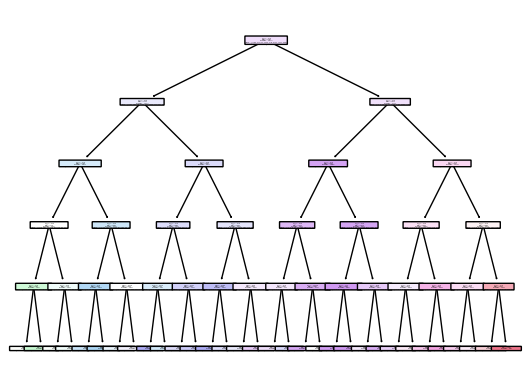

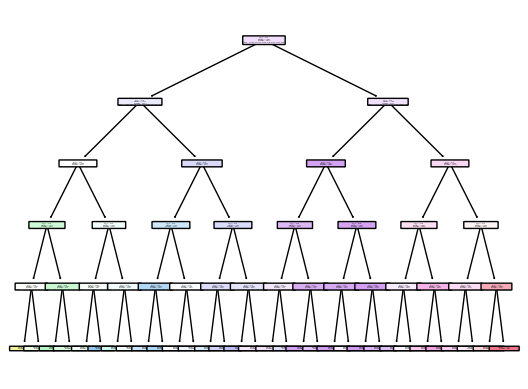

In [20]:
clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=5,min_samples_leaf=10)
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=10)

model4 = clf_gini.fit(X_train, y_train_map)
model5 = clf_entropy.fit(X_train, y_train_map)

y_pred_map=model4.predict(X_test)
y_pred=y_pred_map/10
MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of model with gini as criterion is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of model with gini as criterion is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of model with gini as criterion is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of model with gini as criterion is: ",RMSE)

print(classification_report(y_test_map,y_pred_map))

plt.figure()
plot_tree(clf_gini,filled="True",rounded="True")

y_pred_map=model5.predict(X_test)
y_pred=y_pred_map/10
MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of model with entropy as criterion is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of model with entropy as criterion is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of model with entropy as criterion is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of model with entropy as criterion is: ",RMSE)

print(classification_report(y_test_map,y_pred_map))

plt.figure()
plot_tree(clf_entropy,filled="True",rounded="True")


In [21]:
regressor = DecisionTreeRegressor(criterion="absolute_error")

model7 = regressor.fit(X_train, y_train_map)

y_pred_map=model7.predict(X_test)
y_pred=y_pred_map/10
MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of Decission Tree Regressor (Abs error) is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of Decission Tree Regressor (Abs error) is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of Decission Tree Regressor (Abs error) is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of Decission Tree Regressor (Abs error) is: ",RMSE)

regressor = DecisionTreeRegressor(criterion="poisson")

model8 = regressor.fit(X_train, y_train_map)

y_pred_map=model8.predict(X_test)
y_pred=y_pred_map/10
MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of Decission Tree Regressor (Poisson) is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of Decission Tree Regressor (Poisson) is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of Decission Tree Regressor (Poisson) is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of Decission Tree Regressor (Poisson) is: ",RMSE)

regressor = DecisionTreeRegressor(criterion="squared_error")

model9 = regressor.fit(X_train, y_train_map)

y_pred_map=model9.predict(X_test)
y_pred=y_pred_map/10
MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of Decission Tree Regressor (Squared error) is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of Decission Tree Regressor (Squared error) is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of Decission Tree Regressor (Squared error) is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of Decission Tree Regressor (Squared error) is: ",RMSE)

MAE of Decission Tree Regressor (Abs error) is:  0.4408
MAPE of Decission Tree Regressor (Abs error) is:  12.560416666666669
MSE of Decission Tree Regressor (Abs error) is:  0.3667
RMSE of Decission Tree Regressor (Abs error) is:  0.6055575942881074
MAE of Decission Tree Regressor (Poisson) is:  0.41875
MAPE of Decission Tree Regressor (Poisson) is:  12.01718253968254
MSE of Decission Tree Regressor (Poisson) is:  0.345275
RMSE of Decission Tree Regressor (Poisson) is:  0.5876010551386034
MAE of Decission Tree Regressor (Squared error) is:  0.41885
MAPE of Decission Tree Regressor (Squared error) is:  12.008369047619047
MSE of Decission Tree Regressor (Squared error) is:  0.346075
RMSE of Decission Tree Regressor (Squared error) is:  0.5882813952523062


In [22]:

model2=OneVsRestClassifier(LinearSVC()).fit(X_train, y_train_map)
y_pred_map=model2.predict(X_test)
y_pred=y_pred_map/10
MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of model OneVsRestClassifier is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of model OneVsRestClassifier is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of model OneVsRestClassifier is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of model OneVsRestClassifier is: ",RMSE)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

MAE of model OneVsRestClassifier is:  0.38255
MAPE of model OneVsRestClassifier is:  12.567976190476191
MSE of model OneVsRestClassifier is:  0.314425
RMSE of model OneVsRestClassifier is:  0.5607361233236182


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
clf = OutputCodeClassifier(LinearSVC(),code_size=2, random_state=0)
model3=clf.fit(X_train, y_train_map)
y_pred_map=model3.predict(X_test)
y_pred=y_pred_map/10

MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of Error-Correcting Output Code-based model is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of Error-Correcting Output Code-based model is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of Error-Correcting Output Code-based model is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of Error-Correcting Output Code-based model is: ",RMSE)

MAE of Error-Correcting Output Code-based model is:  0.41425
MAPE of Error-Correcting Output Code-based model is:  13.700051587301587
MSE of Error-Correcting Output Code-based model is:  0.354175
RMSE of Error-Correcting Output Code-based model is:  0.5951260370711401


In [24]:
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model6=clf.fit(X_train, y_train_map)
y_pred_map=model6.predict(X_test)
y_pred=y_pred_map/10

MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of Random Forest (Entropy) model is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of Random Forest (Entropy) model is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of Random Forest (Entropy) model is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of Random Forest (Entropy) model is: ",RMSE)

clf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42)
model6=clf.fit(X_train, y_train_map)
y_pred_map=model6.predict(X_test)
y_pred=y_pred_map/10

MAE=np.mean(np.absolute(np.subtract(y_pred, y_test)))
print("MAE of Random Forest (Gini) model is: ",MAE)
MAPE=100*np.mean(np.absolute((np.subtract(y_pred, y_test))/np.array(y_test)))
print("MAPE of Random Forest (Gini) model is: ",MAPE)
MSE=np.square(np.subtract(y_test, y_pred)).mean()
print("MSE of Random Forest (Gini) model is: ",MSE)
RMSE=np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
print("RMSE of Random Forest (Gini) model is: ",RMSE)

MAE of Random Forest (Entropy) model is:  0.3458
MAPE of Random Forest (Entropy) model is:  10.00479761904762
MSE of Random Forest (Entropy) model is:  0.25525
RMSE of Random Forest (Entropy) model is:  0.5052227231627651
MAE of Random Forest (Gini) model is:  0.3446
MAPE of Random Forest (Gini) model is:  9.951670634920633
MSE of Random Forest (Gini) model is:  0.25235
RMSE of Random Forest (Gini) model is:  0.5023445033042564
